### Computer Vision - Task 2

#### 2.a.) Take any 3 images. Write a python code for any three image enhancement techniques and display the result (4).
#### b.)  Write a detailed analysis of each enhancement technique’s effects on the images. Consider aspects like brightness, contrast, color balance and overall quality improvement (6).

In [80]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def show(img, title="", cmap=None):
    plt.figure(figsize=(4,4))
    if cmap is None and len(img.shape) == 3:
        #Convert BGR (Opencv default) to RGB for proper display
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap if cmap else "gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

Image 1 Loaded successfully. Shape: (1024, 1024, 3)


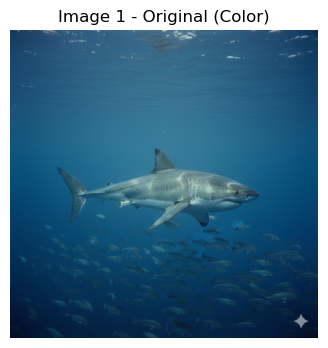

Image 2 Loaded successfully. Shape: (1024, 1024, 3)


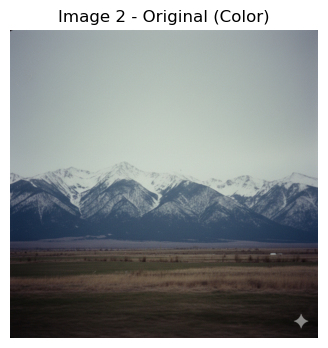

Image 3 Loaded successfully. Shape: (1024, 1024, 3)


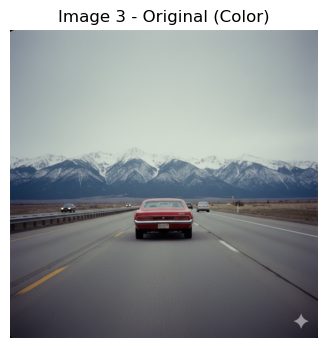

In [84]:
#Loading 3 images
img1 = cv2.imread("/Users/santhoshkumarg/Downloads/Python_Training/Shark.png")
img2 = cv2.imread("/Users/santhoshkumarg/Downloads/Python_Training/Mountain_view.png")
img3 = cv2.imread("/Users/santhoshkumarg/Downloads/Python_Training/Car.png")

#img check
for i, img in enumerate([img1, img2, img3], start=1):
    if img is None:
        print(f"Image {i} failed to load. Please check the path.")
    else:
        print(f"Image {i} Loaded successfully. Shape: {img.shape}")
        show(img, title=f"Image {i} - Original (Color)")

#### Enhancement Technique 1 : Histogram Equalization

In [87]:
def histogram_equalization(image):
    #Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    return equalized

#### Enhancement Technique 2 : Contrast Stretching

In [90]:
def contrast_stretching(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    min_pixel = np.min(gray)
    max_pixel = np.max(gray)
    stretched = 255 * (gray - min_pixel) / (max_pixel - min_pixel)
    return stretched.astype(np.uint8)

#### Enhancement Technique 3 : Sharpening

In [93]:
# Enhancement Technique 3: Sharpening
def sharpening(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

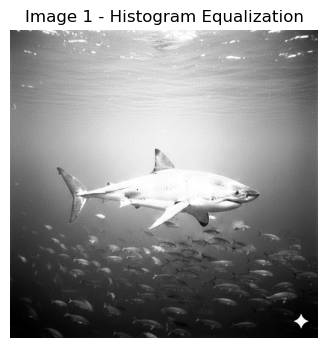

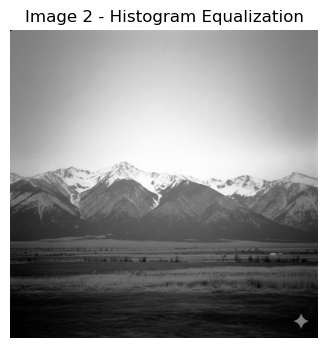

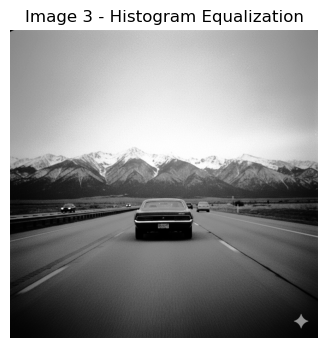

In [95]:
#Apply Histogram Equalization to all 3 images
enhanced1 = histogram_equalization(img1)
enhanced2 = histogram_equalization(img2)
enhanced3 = histogram_equalization(img3)

#Display results
show(enhanced1, title="Image 1 - Histogram Equalization", cmap="gray")
show(enhanced2, title="Image 2 - Histogram Equalization", cmap="gray")
show(enhanced3, title="Image 3 - Histogram Equalization", cmap="gray")

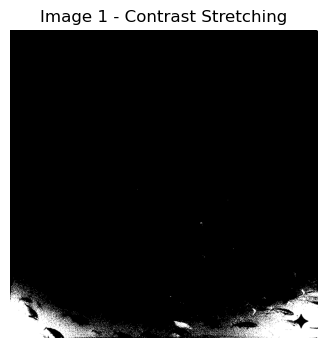

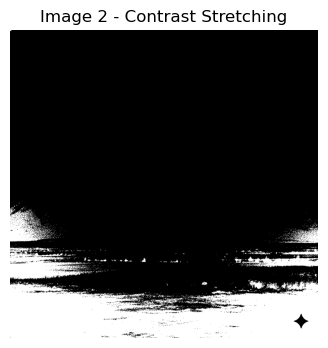

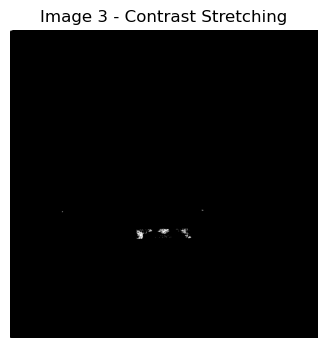

In [97]:
# Apply Contrast Stretching to all 3 images
enhanced1_cs = contrast_stretching(img1)
enhanced2_cs = contrast_stretching(img2)
enhanced3_cs = contrast_stretching(img3)

# Display results
show(enhanced1_cs, title="Image 1 - Contrast Stretching", cmap='gray')
show(enhanced2_cs, title="Image 2 - Contrast Stretching", cmap='gray')
show(enhanced3_cs, title="Image 3 - Contrast Stretching", cmap='gray')


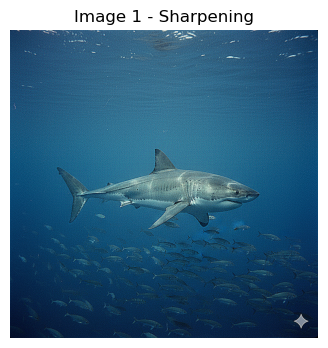

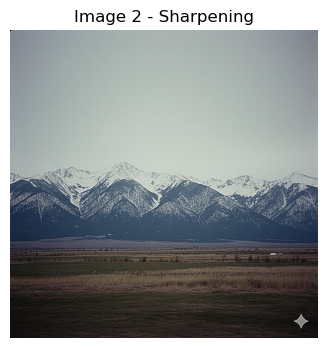

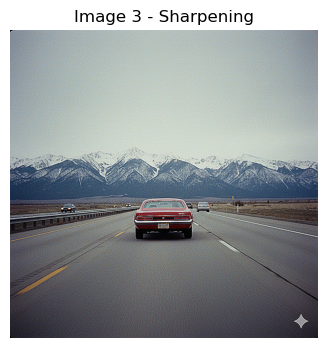

In [99]:
# Apply Sharpening to all 3 images
enhanced1_sh = sharpening(img1)
enhanced2_sh = sharpening(img2)
enhanced3_sh = sharpening(img3)

# Display results
show(enhanced1_sh, title="Image 1 - Sharpening")
show(enhanced2_sh, title="Image 2 - Sharpening")
show(enhanced3_sh, title="Image 3 - Sharpening")


## Analysis of Image Enhancement Techniques

### 1. Histogram Equalization
- **Brightness & Contrast**: Redistributes pixel intensities to cover the full range, improving contrast in darker or washed-out regions.
- **Color Balance**: Applied on grayscale, so color information is lost. Works best for enhancing structural details rather than color.
- **Overall Quality**: Effective for revealing hidden details in low-light images, but may over-enhance noise or flatten natural brightness variations.

### 2. Contrast Stretching
- **Brightness & Contrast**: Linearly scales pixel values between minimum and maximum, producing a balanced improvement in brightness and contrast.
- **Color Balance**: Since applied on grayscale, color is not preserved. However, the technique ensures better tonal separation.
- **Overall Quality**: Simple and effective for images with narrow intensity ranges. Limitations include sensitivity to outliers (extreme pixel values can dominate scaling).

### 3. Sharpening
- **Brightness & Contrast**: Enhances local contrast around edges, making boundaries more distinct. Brightness remains largely unchanged.
- **Color Balance**: Preserves original color since applied on the full image. Can sometimes exaggerate noise in textured regions.
- **Overall Quality**: Improves clarity and sharpness, useful for highlighting fine details. However, excessive sharpening may introduce artifacts or unnatural appearance.

---

### **Conclusion**
- **Histogram Equalization**: Best for improving visibility in low-light or low-contrast grayscale images.  
- **Contrast Stretching**: Provides balanced brightness and contrast enhancement, especially for images with limited intensity variation.  
- **Sharpening**: Enhances edge definition and detail, making images appear clearer, but requires careful use to avoid noise amplification.  

Together, these techniques demonstrate different aspects of enhancement: global intensity adjustment (Histogram Equalization, Contrast Stretching) versus local detail improvement (Sharpening).
